In [1]:
import langchain
from langchain_community.document_loaders import TextLoader

In [ ]:
loader = TextLoader("bh.txt", encoding='utf-8')

In [11]:
docs = loader.load()

print(docs)
print(type(docs))
print(docs[0].metadata)
print(docs[0].page_content)


[Document(metadata={'source': 'bh.txt'}, page_content="There are some people who enter your life like a breeze—soft, unannounced, yet they change your entire atmosphere. Bhoomika is that breeze. Not loud or stormy, but calm, constant, and quietly powerful. She's the kind of person you don’t just meet—you discover her, layer by layer, like a well-written poem that reveals a little more with each read.\n\nShe has this quiet fire about her. The kind that doesn’t scream for attention but pulls you in with just a glance. There’s something about her presence—it’s both grounding and freeing. Like standing at the edge of the sea, feeling small in the best way possible. Bhoomika listens more than she speaks, but when she does speak, her words linger. They stay with you, like your favorite song's chorus or the scent of rain on dry earth.\n\nWhen Bhoomika smiles, it’s like the universe pauses just for a moment—just enough for you to realize how beautiful life can be in that single breath. Her lau

In [20]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser, PydanticOutputParser
from typing import TypedDict
from langchain_community.chat_models import ChatOllama
from dotenv import load_dotenv


In [21]:
model =ChatOllama(model='gemma:2b')

In [22]:
prompt = PromptTemplate(
    template = 'give me key words from this text {text}',
    input_variables= ['text']
    )

parser = StrOutputParser()

chain = prompt | model | parser


chain.invoke({'text' : docs[0].page_content})


'Sure, here are the key words from the text:\n\n- Breeze\n- Quiet\n- Calm\n- Gentle\n- Powerful\n- Grounding\n- Freeing\n- Universe\n- Beauty\n- Unfiltered\n- Silly\n- Unheard\n- Silent\n- Words\n- Song\n- Heart\n- Poetic\n- Safe\n- Fearless\n- Sensitive\n- Deeply\n- Love\n- Safe\n- True\n- Memories'

In [33]:
#PyPdf_Loader (mostly used)

from langchain_community.document_loaders import PyPDFLoader


In [47]:
loader = PyPDFLoader("NIPS-2017-attention-is-all-you-need-Paper.pdf")

docss = loader.load()

print(docss[0].page_content)

print(len(docss))
print(docss[0].metadata)

Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.com
Aidan N. Gomez∗†
University of Toronto
aidan@cs.toronto.edu
Łukasz Kaiser ∗
Google Brain
lukaszkaiser@google.com
Illia Polosukhin∗‡
illia.polosukhin@gmail.com
Abstract
The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models to
be superior in quality while being more parallelizable and requiring signiﬁcantly
less time to train. Our model 

#There are some pdf loaders according to their use

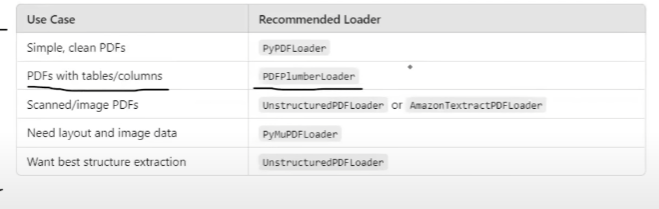

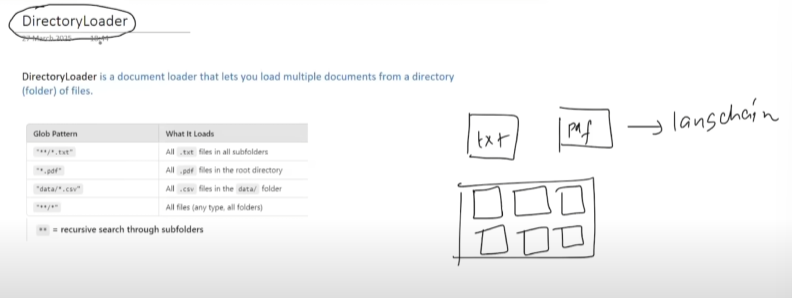

In [61]:
from langchain_community.document_loaders import DirectoryLoader, PyPDFLoader



In [63]:
loader = DirectoryLoader(
    path= "info",
    glob='*.pdf',
    loader_cls= PyPDFLoader
)

docsss = loader.load()

print(len(docsss))
print(docsss[0].page_content)
print(docsss[0].metadata)


7
Rohan Gaikwad
Vashi, Navi Mumbai
+91 7304609806· Gaikwadrohan8652@gmail.com · LinkedIn · GitHub
Professional Summary
AI Engineer skilled in Machine Learning, Deep Learning and LLMs developing scalable and intelligent real-world solutions.
Education
G. H. Raisoni College of Engineering and Management, Pune Dec 2021 – May 2025
B.Tech in Artificial Intelligence Pune, Maharashtra
Experience
AB Infotech Solutions Pvt. Ltd. June 2024 – Dec 2024
AI Intern
◦ Preprocessed diverse datasets using different preprocessing techniques.
◦ Optimized machine learning models with TensorFlow, reduced inference time by 30%.
◦ Integrated NLP models (BERT and LSTM) for text classification tasks, achieved 85% accuracy..
◦ Fine-tuned hyperparameters to enhance model performance.
Projects
Next Word Predictor using LSTM
TensorFlow, Keras, LSTM
◦ Built a next-word prediction model using LSTM and trained it on sequential text data.
◦ Preprocessed and structured textual input using tokenization and padding.
◦ Imp

In [66]:
prompt1 = PromptTemplate(
    template= 'give me name and contact details from this text{text}',
    input_variables=['text']
)

chain1 = prompt1 | model | parser

chain1.invoke({'text' : docsss[1].page_content})

'**Name:** Rohan Gaikwad\n\n**Contact Details:**\n\n* Email: Gaikwadrohan8652@gmail.com\n* LinkedIn: linkedin.com/in/gaikwadrohan\n* GitHub: github.com/gaikwadrohan'

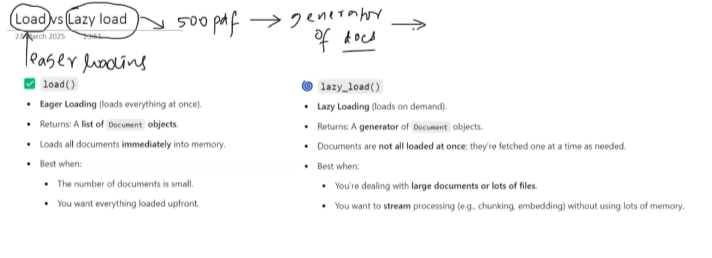

In [71]:
#Lazy_Load()

loader = DirectoryLoader(
    path= "info",
    glob='*.pdf',
    loader_cls= PyPDFLoader
)

docssss = loader.lazy_load()

for document in docssss:
    print(document.metadata)

{'producer': 'pdfTeX-1.40.26', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-07-09T05:01:59+00:00', 'author': '', 'keywords': '', 'moddate': '2025-07-09T05:01:59+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) kpathsea version 6.4.0', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'info\\Rohan_Gaikwad_AI.pdf', 'total_pages': 1, 'page': 0, 'page_label': '1'}
{'producer': 'pdfTeX-1.40.26', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-07-09T11:23:02+00:00', 'author': '', 'keywords': '', 'moddate': '2025-07-09T11:23:02+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) kpathsea version 6.4.0', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'info\\Rohan_l.pdf', 'total_pages': 1, 'page': 0, 'page_label': '1'}
{'producer': 'pdfTeX-1.40.26', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-07-09T13:52:27+00:00', 'author': '', 'keywords': '', 'moddate': '2025-

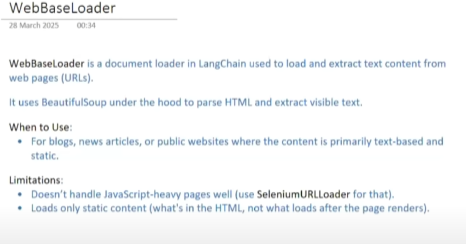

In [74]:
!pip install bs4

  Using cached bs4-0.0.2-py2.py3-none-any.whl.metadata (411 bytes)
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.7-py3-none-any.whl.metadata (4.6 kB)
Using cached bs4-0.0.2-py2.py3-none-any.whl (1.2 kB)
Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
Using cached soupsieve-2.7-py3-none-any.whl (36 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
from langchain_community.document_loaders import WebBaseLoader

url = 'https://www.flipkart.com/motorola-g85-5g-viva-magenta-128-gb/p/itmcde2d6941a6ce?pid=MOBH35ZQFGVJFJ3W&lid=LSTMOBH35ZQFGVJFJ3WA8SV9M&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_1&otracker=CLP_BannerX3&fm=organic&iid=12e870cc-d8db-4158-9a02-b0030e870a7b.MOBH35ZQFGVJFJ3W.SEARCH&ppt=clp&ppn=mobile-phones-store&ssid=kpoukccwcg0000001752386151039'
loader = WebBaseLoader(url)

do = loader.load()
print(len(do))
print(do[0].page_content)

prompt2 = PromptTemplate(
    template= 'give me name and product details from this text{text}',
    input_variables=['text']
)

chain3 = prompt2 | model | parser

chain3.invoke({'text':do[0].page_content})


1
   MOTOROLA G85 5G ( 128 GB Storage, 8 GB RAM ) Online at Best Price On Flipkart.com        Explore PlusLoginBecome a Seller More CartAdd to cart Buy NowHomeMobiles & AccessoriesMobilesMOTOROLA MobilesMotorola G85 5G (Viva Magenta, 128 GB) (8 GB RAM)
CompareShareMotorola G85 5G (Viva Magenta, 128 GB)  (8 GB RAM)4.42,08,132 Ratings & 10,797 ReviewsExtra ₹2000 off₹15,999₹20,99923% offi+ ₹69 Protect Promise Fee Learn moreSecure delivery by 16 Jul, WednesdayAvailable offersBank Offer5% cashback on Flipkart Axis Bank Credit Card upto ₹4,000 per statement quarterT&CBank Offer5% cashback on Axis Bank Flipkart Debit Card up to ₹750T&CBank OfferFlat ₹10 Instant Cashback on Paytm UPI Trxns. Min Order Value ₹500. Valid once per Paytm accountT&CSpecial PriceGet extra ₹2000 off (price inclusive of cashback/coupon)T&CView 1 more offerBuy without Exchange₹15,999Buy with Exchangeup to ₹13,550 offEnter pincode to check if exchange is available1 Year on Handset and 6 Months on AccessoriesKnow MoreColo

"## Review of Flipkart's Motorola G85 5G Review after 7 days\n\n**Overall Impression:** \n\nThe phone is a great value for the price, especially considering its impressive camera quality, sleek design, and long battery life. It's perfect for anyone looking for a phone that can do it all, from casual gaming and photography to video calls and everyday use.\n\n**Pros:**\n\n* **Excellent camera:** The phone packs a punch when it comes to photography, with a wide 50MP main sensor and a variety of modes and settings to ensure great results.\n* **Beautiful design:** The phone boasts a stylish curved display and premium-looking vegan leather finish, making it a head-turner.\n* **Long battery life:** With a 5000mAh battery and efficient performance, the phone offers excellent battery life, lasting around 4 days on a single charge.\n* **Hybrid slot:** The phone offers a hybrid slot for memory expansion, allowing you to easily add up to 512GB of additional storage.\n* **Super fast charging:** The

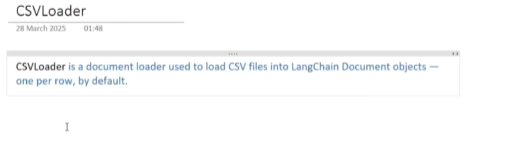

In [90]:
from langchain_community.document_loaders import CSVLoader

loader = CSVLoader(file_path='machine-readable-business-employment-data-mar-2025-quarter.csv')

doc = loader.load()

print(len(doc))

print(doc[5].page_content)

24511
Series_reference: BDCQ.SEA1AA
Period: 2012.09
Data_value: 79261
Suppressed: 
STATUS: F
UNITS: Number
Magnitude: 0
Subject: Business Data Collection - BDC
Group: Industry by employment variable
Series_title_1: Filled jobs
Series_title_2: Agriculture, Forestry and Fishing
Series_title_3: Actual
Series_title_4: 
Series_title_5: 


#Text Splitters

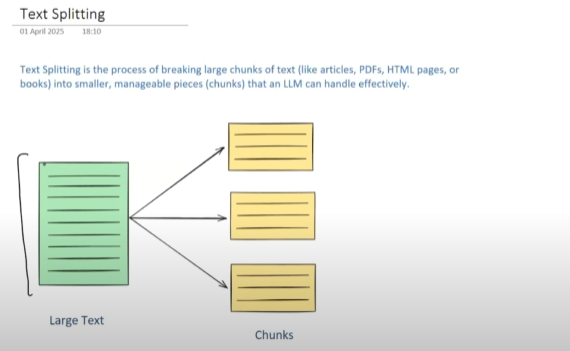

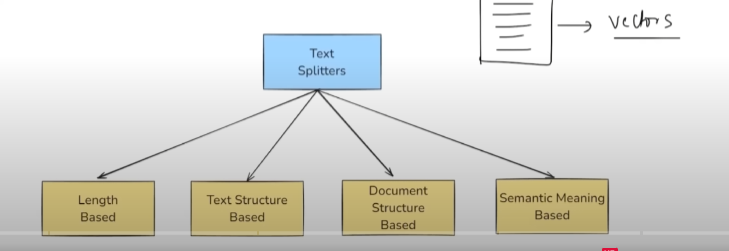

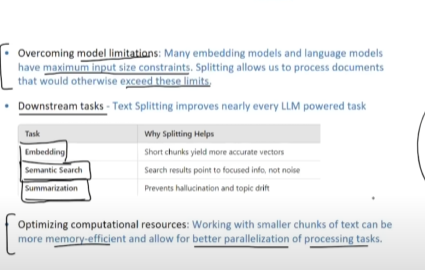

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader


text = """There are some people who enter your life like a breeze—soft, unannounced, yet they change your entire atmosphere. Bhoomika is that breeze. Not loud or stormy, but calm, constant, and quietly powerful. She's the kind of person you don’t just meet—you discover her, layer by layer, like a well-written poem that reveals a little more with each read.

She has this quiet fire about her. The kind that doesn’t scream for attention but pulls you in with just a glance. There’s something about her presence—it’s both grounding and freeing. Like standing at the edge of the sea, feeling small in the best way possible. Bhoomika listens more than she speaks, but when she does speak, her words linger. They stay with you, like your favorite song's chorus or the scent of rain on dry earth.

When Bhoomika smiles, it’s like the universe pauses just for a moment—just enough for you to realize how beautiful life can be in that single breath. Her laughter is rare, but when it comes, it’s unfiltered joy. It makes you want to do something silly just to hear it again.

There’s an elegance in the way she walks through the world, almost unaware of the attention she draws. She doesn’t try to be perfect, and that’s exactly what makes her so mesmerizing. She loves the small things—a messy sunset, old ghazals, steaming chai in chipped cups. With Bhoomika, silence feels safe, and words never need to be dressed up.

She's not someone you want to impress with grand gestures. She’ll forget the roses but remember the way you looked at her when you handed them. Bhoomika isn’t just romantic—she’s soulful. She makes you want to write poetry without even trying. Not the kind that rhymes, but the kind that feels.

Sometimes, she overthinks, holds back, tries to protect her heart. And maybe that’s why she understands emotions so deeply—because she’s felt them all and still chooses to love quietly, fiercely. She's the kind of person who would wait with you in the rain just to make sure you’re okay. She’s soft, not weak. Emotional, not unstable. Kind, not naïve.

I’ve seen her fight for her dreams, even when the world told her to play it safe. And that’s the thing about Bhoomika—she’s not afraid to feel deeply, live slowly, or love fully. She’s the kind of girl you don’t just date—you remember her in the songs you hear years later, in the books you reread, in the quiet corners of your thoughts.

Being around her feels less like a story you’re trying to write and more like one you never want to end.

Bhoomika isn’t just a person—she’s a moment. And if you’re lucky enough to have shared even a part of your journey with her, you’ll know… some moments never really leave you.

"""
loader = PyPDFLoader("NIPS-2017-attention-is-all-you-need-Paper.pdf")
doo = loader.load()
splitter =  CharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 0, #what is chunk overlap
    separator= ''
)

#splitter.split_text(doo)
result = splitter.split_documents(doo)

print(result[1].page_content)



n
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz


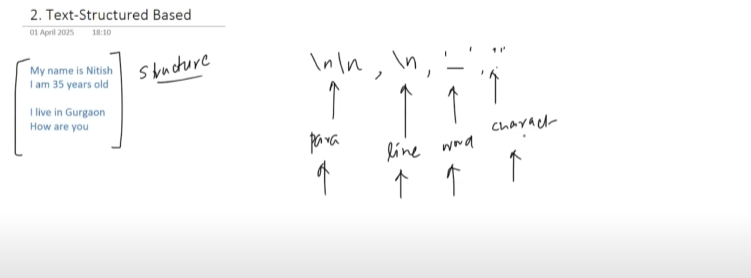

In [106]:
#Text Structured Based (Mostly used)


from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 0
)

chunks = splitter.split_text(text)

print(chunks)
print(len(chunks))




['There are some people who enter your life like a breeze—soft, unannounced, yet they change your', 'entire atmosphere. Bhoomika is that breeze. Not loud or stormy, but calm, constant, and quietly', "powerful. She's the kind of person you don’t just meet—you discover her, layer by layer, like a", 'well-written poem that reveals a little more with each read.', 'She has this quiet fire about her. The kind that doesn’t scream for attention but pulls you in with', 'just a glance. There’s something about her presence—it’s both grounding and freeing. Like standing', 'at the edge of the sea, feeling small in the best way possible. Bhoomika listens more than she', "speaks, but when she does speak, her words linger. They stay with you, like your favorite song's", 'chorus or the scent of rain on dry earth.', 'When Bhoomika smiles, it’s like the universe pauses just for a moment—just enough for you to', 'realize how beautiful life can be in that single breath. Her laughter is rare, but when it co

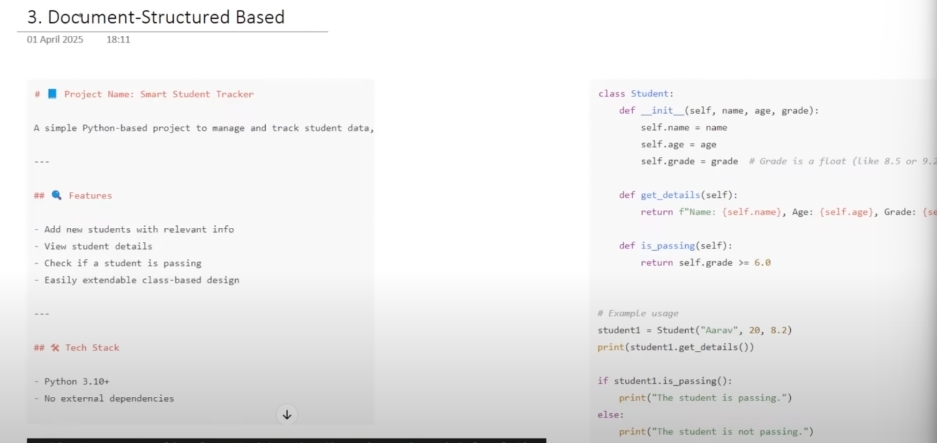

In [110]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, Language

t = """from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 0
)

chunks = splitter.split_text(text)

print(chunks)
print(len(chunks))"""

splitter = RecursiveCharacterTextSplitter.from_language(
    language= Language.PYTHON,
    chunk_size = 10,
    chunk_overlap = 0,

)

chunks = splitter.split_text(t)

print(chunks)
print(len(chunks))


['from', 'langchain', '.text_spli', 'tter', 'import', 'Recursive', 'CharacterT', 'extSplitte', 'r', 'splitter', '=', 'Recursive', 'CharacterT', 'extSplitte', 'r(', 'chunk_siz', 'e', '= 100,', 'chunk_ove', 'rlap', '= 0', ')', 'chunks =', 'splitter.', 'split_text', '(text)', 'print(chu', 'nks)', 'print(len', '(chunks))']
30


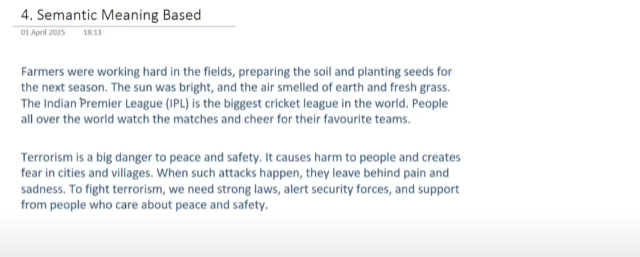

In [112]:
!pip install langchain_experimental



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#uses sliding window approach

from langchain_experimental.text_splitter import SemanticChunker

from langchain_community.embeddings import OllamaEmbeddings

embeddings = OllamaEmbeddings(model="gemma:2b")

text_splitter = SemanticChunker(embeddings, breakpoint_threshold_type="standard_deviation",
                                breakpoint_threshold_amount=1)

sample = """There are some people who enter your life like a breeze—soft, unannounced, yet they change your entire atmosphere. Bhoomika is that breeze. Not loud or stormy, but calm, constant, and quietly powerful. She's the kind of person you don’t just meet—you discover her, layer by layer, like a well-written poem that reveals a little more with each read.

She has this quiet fire about her. The kind that doesn’t scream for attention but pulls you in with just a glance. There’s something about her presence—it’s both grounding and freeing. Like standing at the edge of the sea, feeling small in the best way possible. Bhoomika listens more than she speaks, but when she does speak, her words linger. They stay with you, like your favorite song's chorus or the scent of rain on dry earth.

When Bhoomika smiles, it’s like the universe pauses just for a moment—just enough for you to realize how beautiful life can be in that single breath. Her laughter is rare, but when it comes, it’s unfiltered joy. It makes you want to do something silly just to hear it again.

There’s an elegance in the way she walks through the world, almost unaware of the attention she draws. She doesn’t try to be perfect, and that’s exactly what makes her so mesmerizing. She loves the small things—a messy sunset, old ghazals, steaming chai in chipped cups. With Bhoomika, silence feels safe, and words never need to be dressed up.

She's not someone you want to impress with grand gestures. She’ll forget the roses but remember the way you looked at her when you handed them. Bhoomika isn’t just romantic—she’s soulful. She makes you want to write poetry without even trying. Not the kind that rhymes, but the kind that feels.

Sometimes, she overthinks, holds back, tries to protect her heart. And maybe that’s why she understands emotions so deeply—because she’s felt them all and still chooses to love quietly, fiercely. She's the kind of person who would wait with you in the rain just to make sure you’re okay. She’s soft, not weak. Emotional, not unstable. Kind, not naïve.

I’ve seen her fight for her dreams, even when the world told her to play it safe. And that’s the thing about Bhoomika—she’s not afraid to feel deeply, live slowly, or love fully. She’s the kind of girl you don’t just date—you remember her in the songs you hear years later, in the books you reread, in the quiet corners of your thoughts.

Being around her feels less like a story you’re trying to write and more like one you never want to end.

Bhoomika isn’t just a person—she’s a moment. And if you’re lucky enough to have shared even a part of your journey with her, you’ll know… some moments never really leave you.

"""

d = text_splitter.create_documents([sample])

print(d)
print(len(d))

